# Análise dos campos não *custom field*

## Campos usados
Todos os campos que possuam registro de modificação em algum dos históricos de bugs da base e não sejam campos personalizados (*custom fields*). No total, são 39 campos.


## Importações

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

with open('data\\processed_fields_name_not_cf.json') as input:
  fields = json.load(input)

df_bugs = pd.read_json('data\\processed_bugs_counting_changes_final.json')
df_relations = pd.read_json('data\\processed_bugs_counting_relations.json')

fields_relations = ['assigned_to', 'component', 'product', 'priority', 'status', 'severity', 'platform', 'op_sys']
df_relations = df_relations.merge(df_bugs[fields_relations + ['bug_id']], how='inner', on='bug_id')
df_bugs = df_bugs.drop(columns=['bug_id'])
df_relations = df_relations.drop(columns=['bug_id'])

## 1. Estatísticas por campo
Para cada bug report foi contado quantas modificações de cada campo ocorreram ao longo da sua vida.

### 1.1. Campos: cc, status, resolution, product, component, priority, whiteboard, assigned_to, flagtypes.name e target_milestone

In [2]:
df_bugs.iloc[:, : 10].describe()

,cc,status,resolution,product,component,priority,whiteboard,assigned_to,flagtypes.name,target_milestone
count,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00
mean,2.34,1.34,1.16,0.31,0.27,0.21,0.31,0.41,2.70,0.33
std,3.52,0.89,0.76,0.55,0.55,0.51,1.06,0.65,5.90,0.53
min,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,3.00,1.00
max,773.00,39.00,39.00,7.00,11.00,15.00,351.00,15.00,547.00,15.00


### 1.2. Campos: comment_tag, blocks, keywords, url, version, summary, see_also, depends_on, qa_contact e groups

In [3]:
df_bugs.iloc[:, 10:20].describe()

,comment_tag,blocks,keywords,url,version,summary,see_also,depends_on,qa_contact,groups
count,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00
mean,0.69,0.40,0.28,0.02,0.05,0.16,0.10,0.46,0.03,0.04
std,3.89,1.20,0.83,0.16,0.23,0.46,0.52,5.74,0.20,0.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,519.00,353.00,60.00,7.00,10.00,24.00,190.00,1770.00,8.00,9.00


### 1.3. Campos: attachments.isobsolete, attachments.description, platform, op_sys, is_confirmed, severity, bug_mentor, attachments.mimetype, attachments.filename e alias

In [4]:
df_bugs.iloc[:, 20:30].describe()

,attachments.isobsolete,attachments.description,platform,op_sys,is_confirmed,severity,bug_mentor,attachments.mimetype,attachments.filename,alias
count,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00
mean,0.28,0.06,0.05,0.06,0.05,0.05,0.01,0.01,0.00,0.01
std,1.75,0.65,0.22,0.24,0.21,0.25,0.12,0.11,0.05,0.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,307.00,175.00,5.00,5.00,8.00,6.00,5.00,12.00,11.00,9.00


### 1.4. Campos: attachments.ispatch, regressions, type, restrict_comments, is_cc_accessible, longdescs.isprivate, regressed_by, is_creator_accessible, attachments.isprivate

In [5]:
df_bugs.iloc[:, 30:39].describe()

,attachments.ispatch,regressions,type,restrict_comments,is_cc_accessible,longdescs.isprivate,regressed_by,is_creator_accessible,attachments.isprivate
count,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00,690817.00
mean,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.00
std,0.09,0.30,0.12,0.02,0.02,0.02,0.12,0.02,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,11.00,64.00,7.00,4.00,6.00,6.00,5.00,6.00,4.00


### 1.5 Os 10 campos com maiores valores máximos de modificações em um único bug report

In [6]:
df_bugs.max().sort_values(ascending=False).head(10)

depends_on                 1770
cc                          773
flagtypes.name              547
comment_tag                 519
blocks                      353
whiteboard                  351
attachments.isobsolete      307
see_also                    190
attachments.description     175
regressions                  64
dtype: int64

### 1.6 Os 10 campos com menores valores máximos de modificações em um único bug report

In [7]:
df_bugs.max().sort_values(ascending=True).head(10)

attachments.isprivate    4
restrict_comments        4
regressed_by             5
bug_mentor               5
op_sys                   5
platform                 5
longdescs.isprivate      6
is_cc_accessible         6
severity                 6
is_creator_accessible    6
dtype: int64

## 2. Percentual de presença de campos no histórico de mudanças de bug reports

In [15]:
df_field_change_percents = pd.DataFrame({
  'field':  [],
  'percentage': []
})

for i in range(0, len(fields)):
  current_field = fields[i]
  percent = (df_bugs[current_field].astype(bool).sum(axis=0) / len(df_bugs)) * 100
  
  df_field_change_percents.loc[i] = [current_field, percent]
    

df_field_change_percents_sorted = df_field_change_percents.sort_values(by = 'percentage', ascending = False)

### 2.1 Os 10 campos com maiores percentuais de presença nos históricos de bugs

In [10]:
df_field_change_percents_sorted.loc[df_field_change_percents_sorted['percentage'] > 0].head(10).style.hide(axis='index')

field,percentage
resolution,100.000000
status,100.000000
cc,77.432953
flagtypes.name,48.304109
assigned_to,34.897809
target_milestone,30.676865
comment_tag,28.254950
product,27.002231
component,23.213384
blocks,23.097289


### 2.2 Os 10 campos com menores percentuais de presença nos históricos de bugs

In [11]:
df_field_change_percents_sorted.loc[df_field_change_percents_sorted['percentage'] > 0].tail(10).sort_index(ascending=False).style.hide(axis='index')

field,percentage
attachments.isprivate,0.002316
is_creator_accessible,0.015778
longdescs.isprivate,0.011291
is_cc_accessible,0.017660
restrict_comments,0.033149
attachments.ispatch,0.403435
alias,0.569760
attachments.filename,0.075418
attachments.mimetype,0.705397
bug_mentor,0.877077


## 3. Campos com terceiro quartil maior ou igual a 1

In [12]:
df_quartil_3 = pd.DataFrame(columns=['campo', '3o quartil'])
for field in fields:
  quartil_3 = df_bugs[field].quantile(0.75)

  if (quartil_3 >= 1):
    temp_df = pd.DataFrame([{ 'campo': field, '3o quartil': quartil_3 }], columns=['campo','3o quartil'])
    df_quartil_3 = pd.concat([df_quartil_3, temp_df])

df_quartil_3.sort_values(by='3o quartil', ascending=False).style.hide(axis='index')

campo,3o quartil
cc,3.000000
flagtypes.name,3.000000
status,1.000000
resolution,1.000000
product,1.000000
assigned_to,1.000000
target_milestone,1.000000
comment_tag,1.000000


## 4. Correlações entre contagem de modificações de campos

<AxesSubplot:>

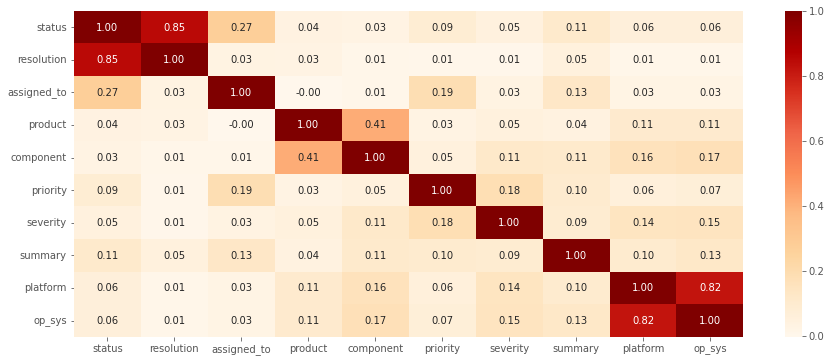

In [9]:
corrs = df_bugs[['status', 'resolution', 'assigned_to', 'product', 'component', 'priority', 'severity', 'summary', 'platform', 'op_sys']].corr()

fig, ax = plt.subplots(1,1,figsize=(15,6))
sns.heatmap(corrs, 
  xticklabels=corrs.columns,
  yticklabels=corrs.columns,
  cmap="OrRd",
  annot=True,
  fmt=".2f",
  ax=ax
)

# cmap = "RdBu_r"
# cmap = "OrRd"

## 5. Correlações entre pares de mudança e mudança individual

### 5.1 Correlação entre component-product

<AxesSubplot:>

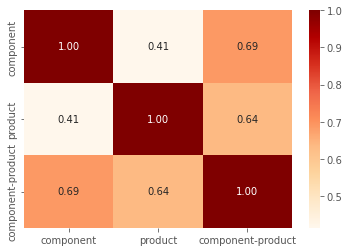

In [10]:
corr_component_product = df_relations[['component', 'product', 'component-product']].corr()

sns.heatmap(corr_component_product, 
  xticklabels=corr_component_product.columns,
  yticklabels=corr_component_product.columns,
  cmap="OrRd",
  annot=True,
  fmt=".2f"
)

### 5.2 Correlação entre assigned_to-status

<AxesSubplot:>

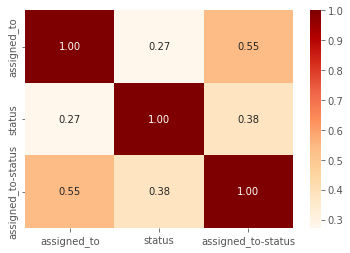

In [11]:
corr_assigned_to_status = df_relations[['assigned_to', 'status', 'assigned_to-status']].corr()

sns.heatmap(corr_assigned_to_status, 
  xticklabels=corr_assigned_to_status.columns,
  yticklabels=corr_assigned_to_status.columns,
  cmap="OrRd",
  annot=True,
  fmt=".2f"
)

### 5.3 Correlação entre assigned_to-priority

<AxesSubplot:>

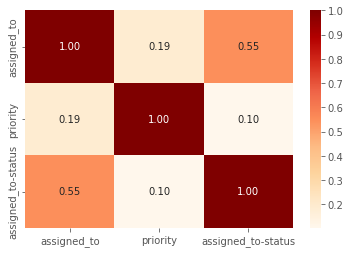

In [12]:
corr_assigned_to_priority = df_relations[['assigned_to', 'priority', 'assigned_to-status']].corr()

sns.heatmap(corr_assigned_to_priority, 
  xticklabels=corr_assigned_to_priority.columns,
  yticklabels=corr_assigned_to_priority.columns,
  cmap="OrRd",
  annot=True,
  fmt=".2f"
)

### 5.4 Correlação entre priority-severity

<AxesSubplot:>

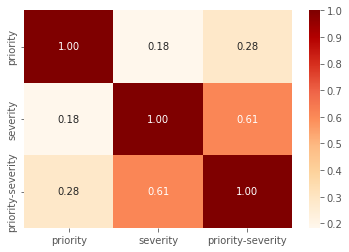

In [13]:
corr_priority_severity = df_relations[['priority', 'severity', 'priority-severity']].corr()

sns.heatmap(corr_priority_severity, 
  xticklabels=corr_priority_severity.columns,
  yticklabels=corr_priority_severity.columns,
  cmap="OrRd",
  annot=True,
  fmt=".2f"
)

### 5.5 Correlação entre platform-op_sys

<AxesSubplot:>

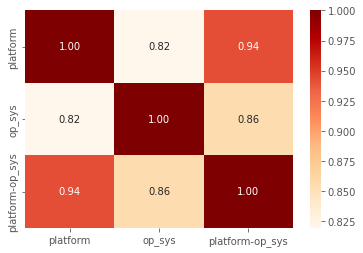

In [3]:
corr_platform_op_sys = df_relations[['platform', 'op_sys', 'platform-op_sys']].corr()

sns.heatmap(corr_platform_op_sys, 
  xticklabels=corr_platform_op_sys.columns,
  yticklabels=corr_platform_op_sys.columns,
  cmap="OrRd",
  annot=True,
  fmt=".2f"
)

## 6. Comparando os 10% de relatórios de bugs com mais mudanças com a base em geral

### 6.1 Os 10 campos com maiores médias de modificações dos 10% de relatórios que mais se alteram

In [42]:
df_bugs['total_changes'] = df_bugs.sum(axis='columns')
df_bugs = df_bugs.sort_values('total_changes', ascending=False)
df_most_changed_bugs = df_bugs.head(int(len(df_bugs)*0.1))

df_bugs.drop(columns=['total_changes'])

df_most_changed_bugs.mean().head(10).sort_values(ascending=False)



flagtypes.name     13.50
cc                  7.86
status              2.10
resolution          1.55
whiteboard          1.06
assigned_to         1.06
target_milestone    0.79
priority            0.49
component           0.45
product             0.40
dtype: float64

### 6.2 Os 10 campos com maiores médias de alterações no geral

In [39]:
df_bugs.mean().head(10).sort_values(ascending=False)

flagtypes.name     2.70
cc                 2.34
status             1.34
resolution         1.16
assigned_to        0.41
target_milestone   0.33
whiteboard         0.31
product            0.31
component          0.27
priority           0.21
dtype: float64